In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

In [2]:
url='https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv'
df = pd.read_csv(url, error_bad_lines=False)
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


The dataset is loaded and converted to a DataFrame using python library.

We can check that this dataset has 158 rows × 12 columns. The output or Y label/dependant variable is the happiness score that we need to predict and rest are input or independant variables.

In [3]:
df.shape

(158, 12)

We have 158 rows and 12 columns

In [4]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

There are no missing values in dataset

In [5]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

We have float type value in all independent variables except happines ranks which is int dtype, country and Region having object dtypes
and Happiness Score is our target variable having float types

In [6]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [7]:
new_data = df.drop(['Country','Region','Happiness Rank'], axis = 1)
new_data

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


From the above dataset we can observe that first three columns that is countary, region and hapiness rank arent contributing to the label. So, we can drop these columns and proceed. So, we have dropped these columns in the above steps and proceed further.

Happiness Score                      AxesSubplot(0.125,0.71587;0.0945122x0.16413)
Standard Error                    AxesSubplot(0.238415,0.71587;0.0945122x0.16413)
Economy (GDP per Capita)          AxesSubplot(0.351829,0.71587;0.0945122x0.16413)
Family                            AxesSubplot(0.465244,0.71587;0.0945122x0.16413)
Health (Life Expectancy)          AxesSubplot(0.578659,0.71587;0.0945122x0.16413)
Freedom                           AxesSubplot(0.692073,0.71587;0.0945122x0.16413)
Trust (Government Corruption)     AxesSubplot(0.805488,0.71587;0.0945122x0.16413)
Generosity                          AxesSubplot(0.125,0.518913;0.0945122x0.16413)
Dystopia Residual                AxesSubplot(0.238415,0.518913;0.0945122x0.16413)
dtype: object

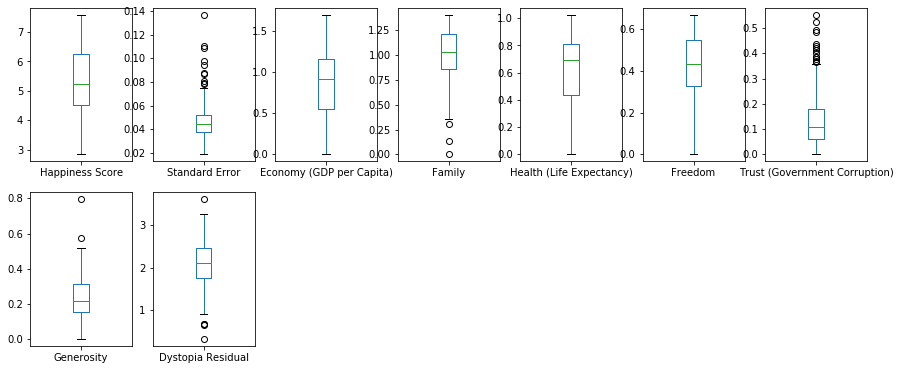

In [8]:
new_data.plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

The above plot shows that several columns contains some outliers in them:- For Eg, Standard error, Trust and Dystopia residual.

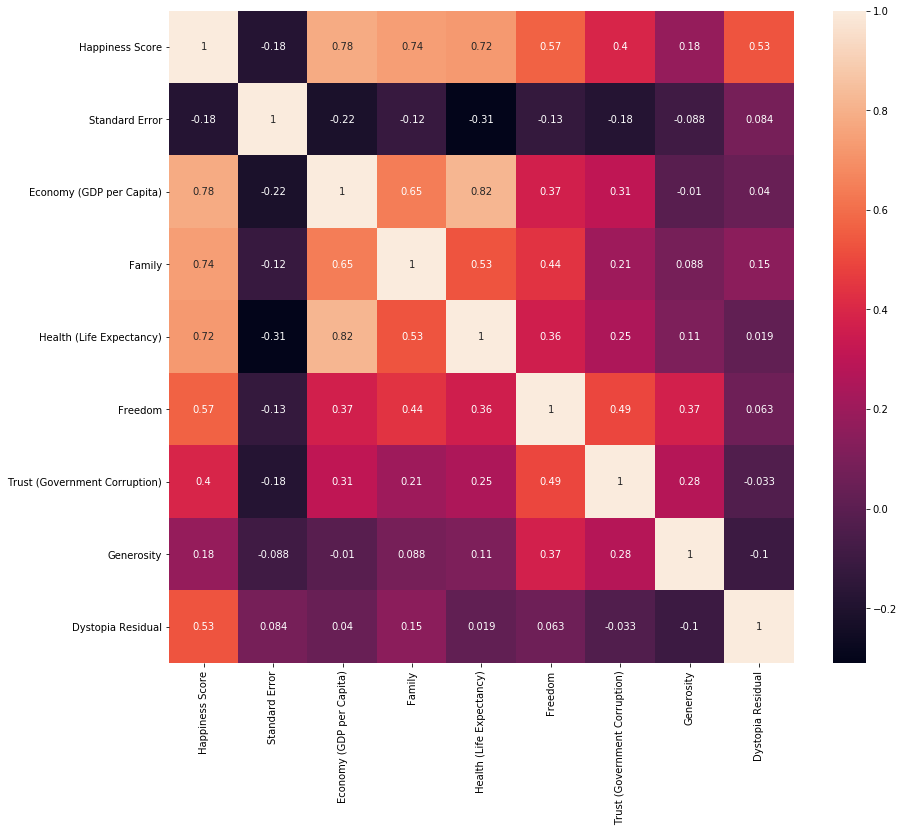

In [9]:
plt.figure(figsize=(14,12))
sns.heatmap(new_data.corr(), annot = True)

From the heatmap representation of the correlation function we can see that our label(y) is highly(positively) related to the Economy, Familya and Health.

It is negatively related to the standard error, hence will drop this column.

In [10]:
dff = new_data.drop("Standard Error" , axis = 1)

In [11]:
dff.shape

(158, 8)

In [12]:
dff.describe()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [13]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(dff))
threshold=3
np.where(z>3)

(array([ 27, 128, 147, 153, 155, 157], dtype=int64),
 array([5, 6, 2, 5, 7, 2], dtype=int64))

In [14]:
dff.shape

(158, 8)


We have droped the column from the dataset and created a new dataset which now have 158 roes and 8 columns.

In [15]:
Data_loss=((158-149)/150)*100

In [16]:
Data_loss

6.0

On finding the data loss is less than 0.7 we can use new dataset for further analysis

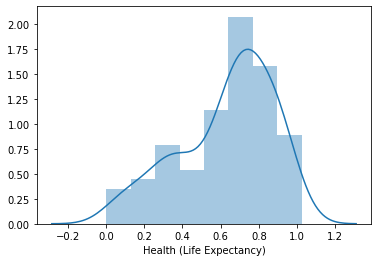

In [17]:
sns.distplot(df['Health (Life Expectancy)'])

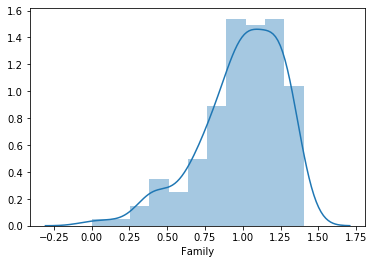

In [18]:
sns.distplot(df['Family'])

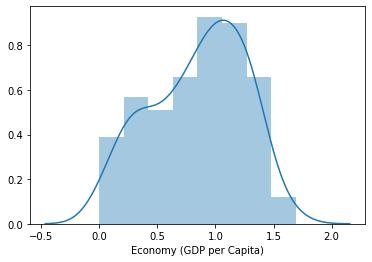

In [19]:
sns.distplot(df['Economy (GDP per Capita)'])

In [20]:
dff.skew()

Happiness Score                  0.097769
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [21]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
X_power=pt.fit_transform(dff)
df_new=pd.DataFrame(X_power,columns=dff.columns)

In [22]:
dff.skew()

Happiness Score                  0.097769
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [23]:
y=df_new["Happiness Score"]
x=df_new.drop("Happiness Score", axis=1)

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state = 30)

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
predict_lr = lr.predict(x_test)


We have created the model and added the values to it.

In [26]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Error Calculations: -')
print('Means absolute error', mean_absolute_error(y_test,predict_lr))
print('Means Squared Error',mean_squared_error(y_test,predict_lr))
print('Root mean square', np.sqrt(mean_squared_error(y_test,predict_lr)))

Error Calculations: -
Means absolute error 0.07913945674812466
Means Squared Error 0.012336180049398135
Root mean square 0.11106835755244666


In [27]:
from sklearn.metrics import r2_score
print(r2_score(y_test,predict_lr))

0.9894561865936256


In [28]:
from sklearn.tree import DecisionTreeRegressor
dc = DecisionTreeRegressor()
dc.fit(x_test,y_test)
pridict_dc = dc.predict(x_test)

In [29]:
dc = DecisionTreeRegressor(splitter='random',min_samples_split = 10,max_features = "sqrt")
dc

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='random')

In [30]:
dc.fit(x_test,y_test)
pridict_dc = dc.predict(x_test)


print('Error Calculations:-')

print('Means absolute error', mean_absolute_error(y_test,pridict_dc))
print('Means Squared Error',mean_squared_error(y_test,pridict_dc))
print('Root mean square', np.sqrt(mean_squared_error(y_test,pridict_dc)))
print('Model Score',r2_score(y_test,pridict_dc))

Error Calculations:-
Means absolute error 0.4908374928822921
Means Squared Error 0.39544616213578504
Root mean square 0.628845101861965
Model Score 0.6620095905595977


In [31]:
from sklearn.svm import SVR
svr = SVR(kernel='poly') #model Score:94 if degree = 5, hencing moving forward with defualt = 3
svr.fit(x_test,y_test)
pridict_sv1 = svr.predict(x_test)


print('Error Calculations:-')

print('Means absolute error', mean_absolute_error(y_test,pridict_sv1))
print('Means Squared Error',mean_squared_error(y_test,pridict_sv1))
print('Root mean square', np.sqrt(mean_squared_error(y_test,pridict_sv1)))
print('Model Score',r2_score(y_test,pridict_sv1))

Error Calculations:-
Means absolute error 0.17314537493159535
Means Squared Error 0.06505952164777058
Root mean square 0.2550676805237594
Model Score 0.9443932032594209


In [32]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200)
rf.fit(x_test,y_test)
pridict_rf = rf.predict(x_test)


print('Error Calculations:-')

print('Means absolute error', mean_absolute_error(y_test,pridict_rf))
print('Means Squared Error',mean_squared_error(y_test,pridict_rf))
print('Root mean square', np.sqrt(mean_squared_error(y_test,pridict_rf)))
print('Model Score',r2_score(y_test,pridict_rf))

Error Calculations:-
Means absolute error 0.12198047732397106
Means Squared Error 0.025630565401871683
Root mean square 0.16009548838699886
Model Score 0.9780933888760488


In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
parameters = { 'kernel' :['linear', 'poly', 'rbf', 'sigmoid']}

grid_cv = GridSearchCV(estimator=svr, param_grid = parameters)

In [35]:
grid_cv.fit(x_test, y_test)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='poly',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [36]:
best_para = grid_cv.best_params_
print(best_para)
best_result = grid_cv.best_score_
print(best_result)
print(round(best_result,2))

{'kernel': 'linear'}
0.9879457243424351
0.99
